In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import astropy.units as u

In [11]:
jd, all_fluxes, err = np.loadtxt('/Users/bmmorris/git/trappist1g_spots/reduced_lcs/all_lightcurves.txt', unpack=True)

In [12]:
from batman import TransitParams
params = TransitParams()
params.per = 12.354473
params.t0 = 2450000 + 7665.35084
params.inc = 89.721
params.a = 83.5
params.rp = (0.764/100)**0.5
params.duration = 0.03620
params.b = 0.406

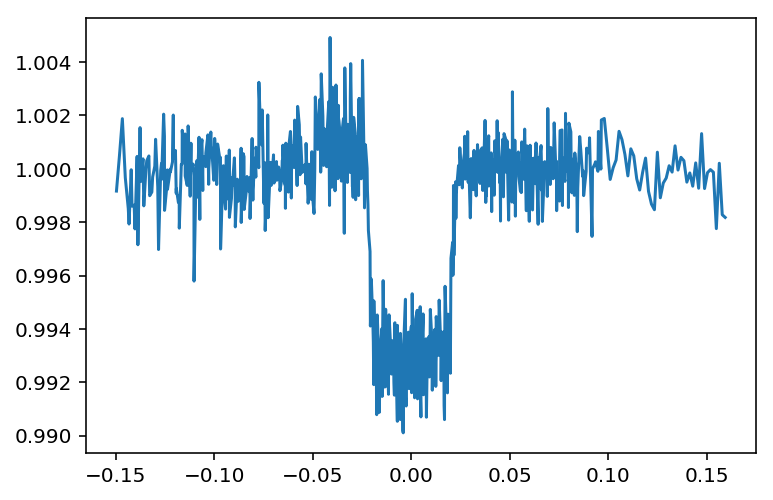

In [39]:
period = 12.354473
t0 = 2450000 + 7665.35084
times = ((jd - t0) % period)
times[times > period/2] -= period

all_fluxes = all_fluxes[np.argsort(phases)]
times = times[np.argsort(times)]

plt.plot(times, all_fluxes)

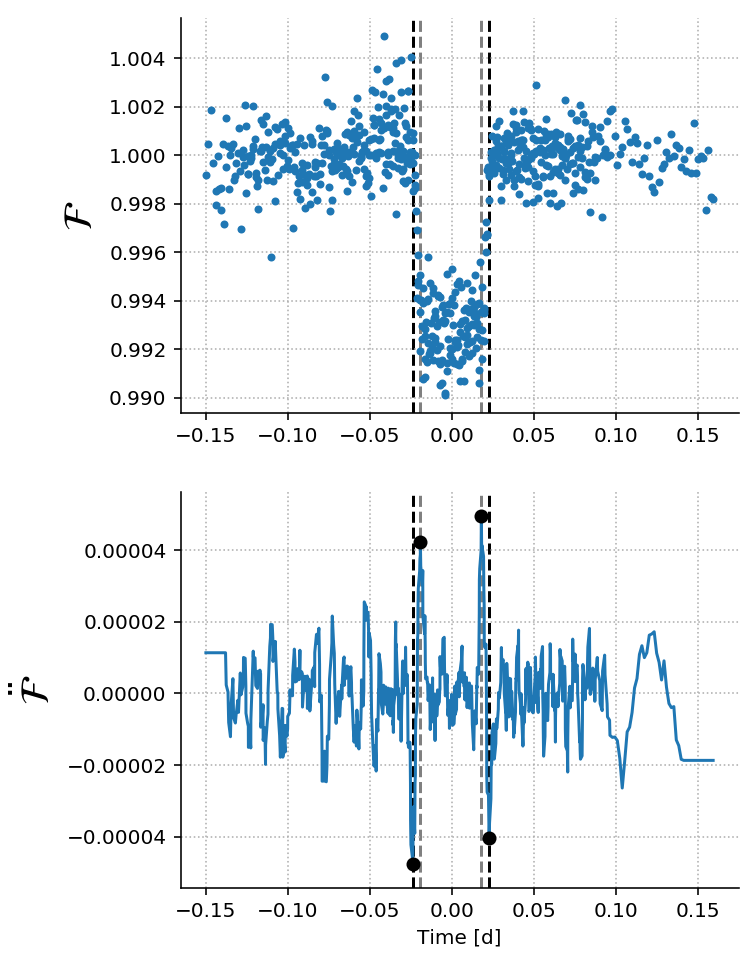

In [14]:
from scipy.signal import savgol_filter

filtered = savgol_filter(all_fluxes, 25, 2, deriv=2)

times = phases

fig, ax = plt.subplots(2, 1, figsize=(5, 8))
# ax[0].plot(times, spotless_lc, label='Spotless')
# ax[0].plot(times, spotted_lc, label='Spotted')
ax[0].plot(phases, all_fluxes, '.')
from scipy.signal import savgol_filter

n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]

ax[1].plot(times, filtered)

t14 = -1*np.diff(times[mins])[0]
t23 = -1*np.diff(times[maxes])[0]

ax[1].scatter(times[mins], filtered[mins], color='k', zorder=10)
ax[1].scatter(times[maxes], filtered[maxes], color='k', zorder=10)

for ts, c in zip([times[mins], times[maxes]], ['k', 'gray']):
    for t in ts:
        ax[0].axvline(t, ls='--', color=c, zorder=-10)
        ax[1].axvline(t, ls='--', color=c, zorder=-10)

for axis in fig.axes:
    axis.grid(ls=':')
    for s in ['right', 'top']:
        axis.spines[s].set_visible(False)
    axis.legend()
        
ax[0].set_ylabel('$\mathcal{F}$', fontsize=20)
ax[1].set_ylabel('$\ddot{\mathcal{F}}$', fontsize=20)
ax[1].set_xlabel('Time [d]')
fig.savefig('trappist1g.pdf', bbox_inches='tight')
plt.show()

In [15]:
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2
print(k, params.rp)

0.0914391128784 0.08740709353364863


17 21.9609810778
19 17.4906277912
21 17.0843482743
23 17.204278963
25 21.1778408474
27 23.4464553578
29 24.5385870759
31 24.5222741224
33 24.8845548477
35 28.2620615017
37 29.1705874654
39 28.4214543813
41 25.2569535429
43 28.7140516967
45 33.3641538868
47 36.8370248565
49 36.1897299767
51 36.3074888161
53 37.7700544505
55 39.2094912443
57 40.669284634
59 42.0501846012
61 40.2767237015
63 43.4973053829
65 46.4955993951
67 47.3614396814
69 48.265850935
71 47.8391895919
0.105894119502 0.0261356558791


(0, 0.25)

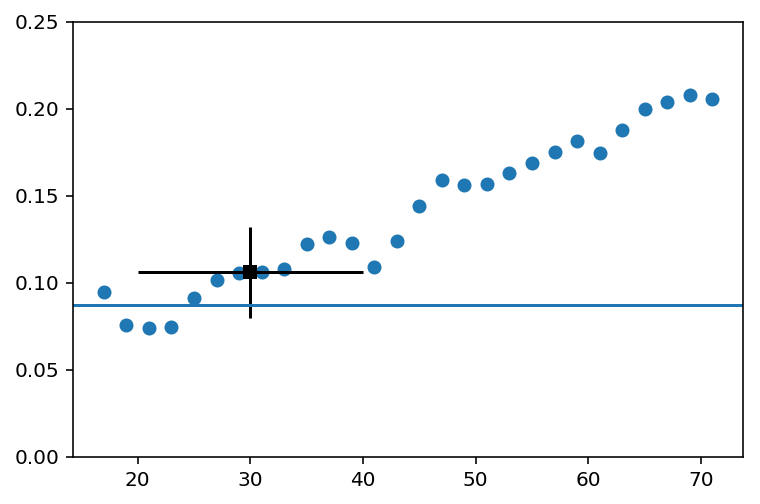

In [38]:
ws = []
ks = []

for w in np.arange(17, 72, 2):
    filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
    n = len(times)//2
    mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
    maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
    t14 = abs(np.diff(times[mins])[0])
    t23 = abs(np.diff(times[maxes])[0])
    one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    k = (one_plus_k - one_minus_k)/2
    print(w, (t14 - t23) * len(times) / times.ptp())

    ws.append(w)
    ks.append(k)

ws = np.array(ws)
ks = np.array(ks)

plt.scatter(ws, ks)

wmid = 30
k = np.median(ks[(ws < 40) & (ws > 20)])
kerr = np.ptp(ks[(ws < 40) & (ws > 20)])/2
plt.errorbar(wmid, k, yerr=kerr, xerr=10, fmt='s', color='k')

print(k, kerr)
plt.axhline(params.rp)
plt.ylim([0, 0.25])

In [36]:
w = 25
filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
t14 = abs(np.diff(times[mins])[0])
t23 = abs(np.diff(times[maxes])[0])
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2

(t14 - t23) * len(times) / times.ptp()

21.177840847397238

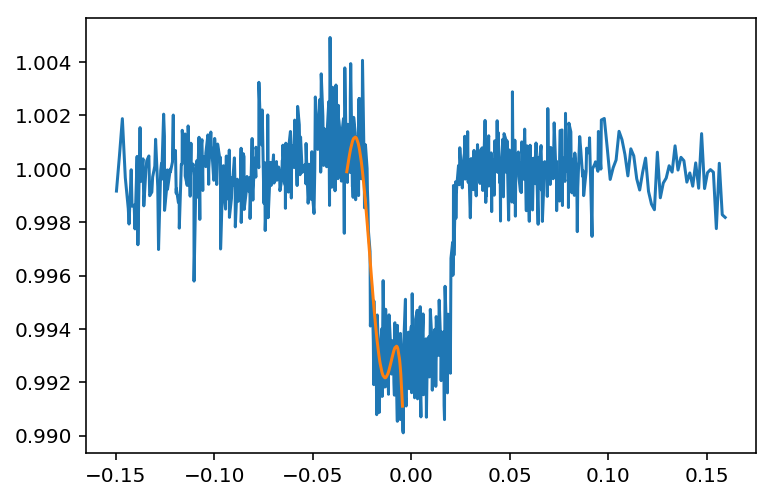

In [35]:
from scipy.interpolate import UnivariateSpline, make_lsq_spline

a0 = 250
n = len(times)//2
spl = UnivariateSpline(times[a0:n], all_fluxes[a0:n], k=)

# spl = make_lsq_spline(times, all_fluxes, [times.min(), times.mean(), times.max()])

plt.plot(times, all_fluxes)
plt.plot(times[a0:n], spl(times[a0:n]))